---
title: "Activity 9.1"
format:
  html:
    embed-resources: true
    code-fold: true
execute:
  echo: true
  warning: false
  message: false
---

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [2]:
import pandas as pd
df = pd.read_csv('/content/ha_1.csv')
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [3]:
import pandas as pd
df = pd.read_csv('/content/ha_1.csv')

df['diagnosis_numeric'] = df['diagnosis'].apply(lambda x: 1 if x == 'Disease' else 0)

# Define X and y
X = df[['age', 'chol']]
y = df['diagnosis_numeric']

from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)

df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,diagnosis_numeric
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,1
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0
3,Mikaila Block,43,1,1,115,303,1,181,Disease,1
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1


In [4]:
import numpy as np

# Get coefficients and intercept from the fitted model
intercept = log_reg_model.intercept_[0]
coef_age = log_reg_model.coef_[0][0]  # Coefficient for 'age'
coef_chol = log_reg_model.coef_[0][1] # Coefficient for 'chol'

# Print the coefficients
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for Age: {coef_age:.4f}")
print(f"Coefficient for Cholesterol: {coef_chol:.4f}")

age_55 = 55

def calculate_cholesterol(target_probability, intercept, coef_age, coef_chol, age):
    # Calculate log-odds (logit) from the target probability
    log_odds = np.log(target_probability / (1 - target_probability))

    # Solve for cholesterol:
    # log_odds = intercept + coef_age * age + coef_chol * chol
    # chol = (log_odds - intercept - coef_age * age) / coef_chol

    cholesterol = (log_odds - intercept - (coef_age * age)) / coef_chol
    return cholesterol

# Calculate cholesterol for 50% probability
chol_50_percent = calculate_cholesterol(0.5, intercept, coef_age, coef_chol, age_55)
print(f"For a 55-year-old, the cholesterol level for a 50% chance of heart disease is: {chol_50_percent:.2f}")

# Calculate cholesterol for 90% probability
chol_90_percent = calculate_cholesterol(0.9, intercept, coef_age, coef_chol, age_55)
print(f"For a 55-year-old, the cholesterol level for a 90% chance of heart disease is: {chol_90_percent:.2f}")

Intercept: 3.2401
Coefficient for Age: -0.0469
Coefficient for Cholesterol: -0.0018
For a 55-year-old, the cholesterol level for a 50% chance of heart disease is: 367.87
For a 55-year-old, the cholesterol level for a 90% chance of heart disease is: -851.97


You would calculate each coefficient then write out the values that you get


0.044 * Age + 0.0028 * chol - 3.335 = 0 (this is 50% since 0 is the dividing line

If you wanted to do 90%, you would change the 0 for log(0.9/0.1)

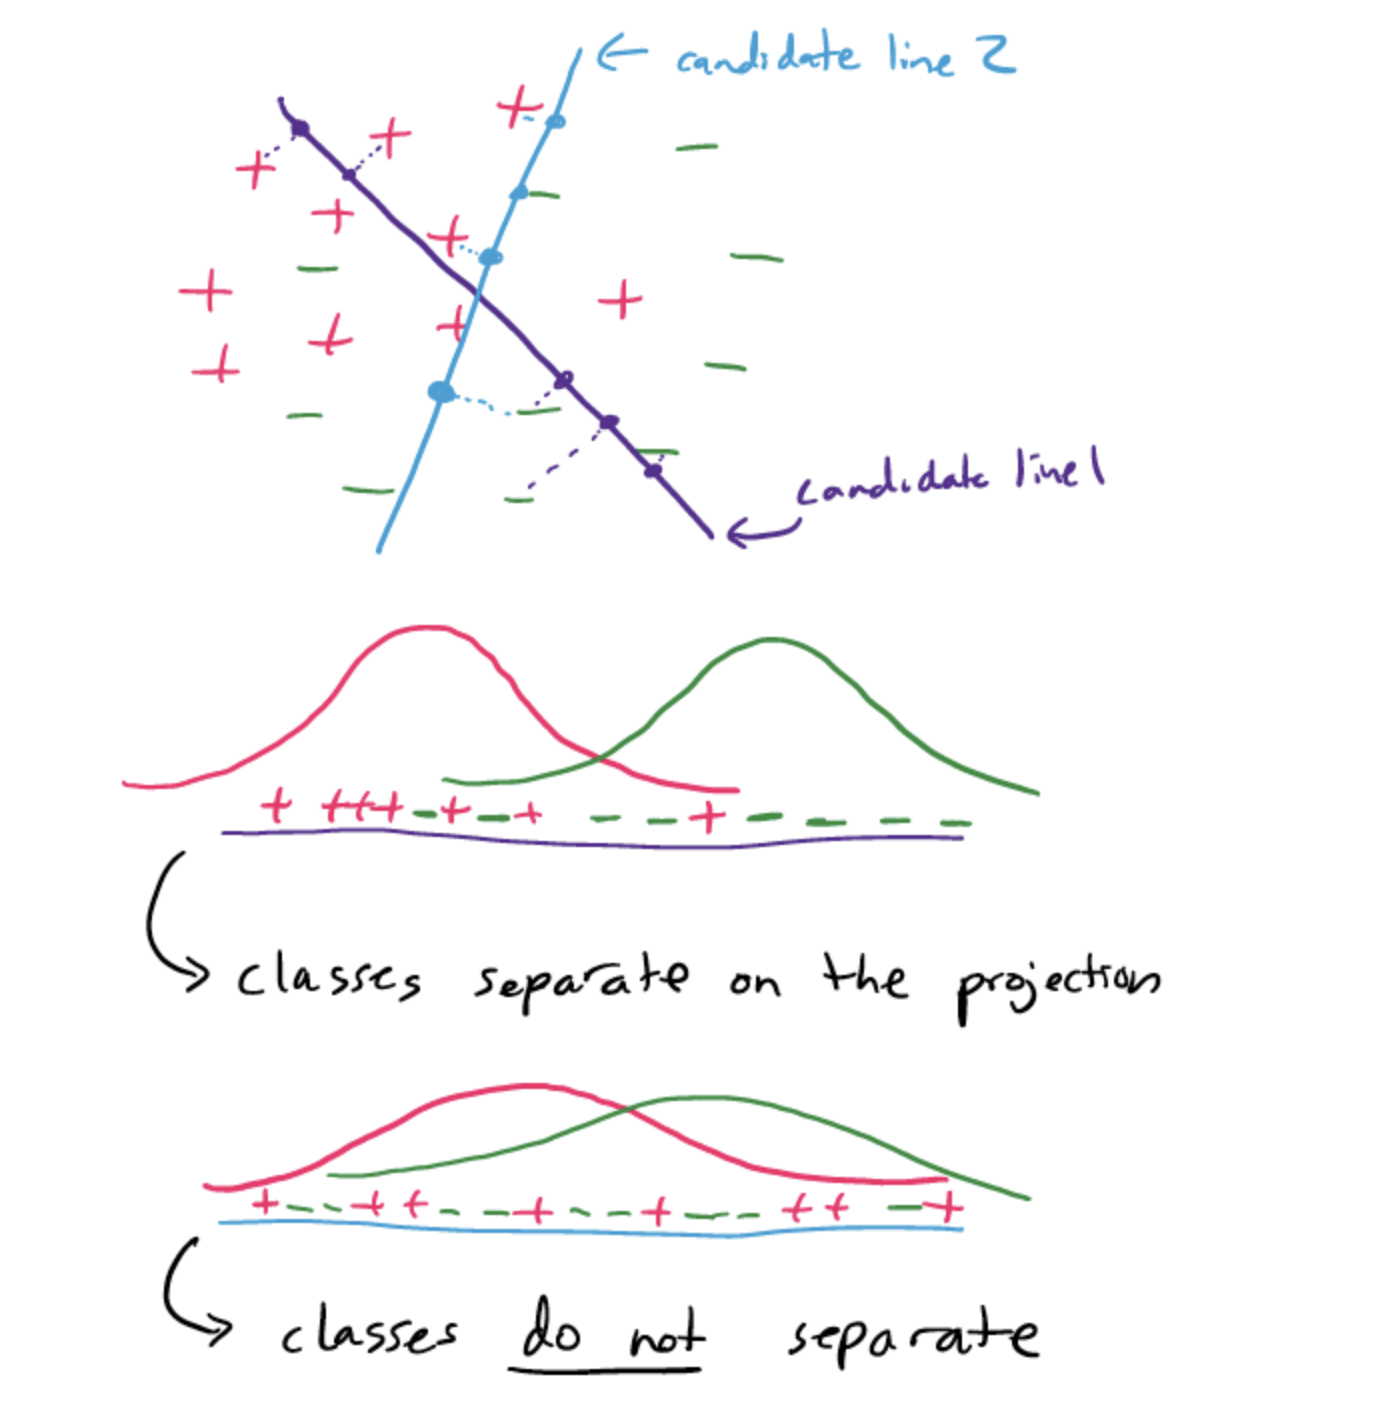

purple is actually better when another variable is present, think about the x from left to right getting larger ---

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)

print("LDA model fitted successfully.")

LDA model fitted successfully.


In [6]:
import numpy as np

# Get the coefficients and intercept from the LDA model
lda_coef = lda_model.coef_[0]
lda_intercept = lda_model.intercept_[0]

# The decision boundary is where the discriminant function equals 0:
# lda_coef[0] * age + lda_coef[1] * chol + lda_intercept = 0

# For a 55-year-old (age = 55), we want to find chol when the discriminant function is 0.
# chol = (-lda_intercept - lda_coef[0] * age) / lda_coef[1]

age_55 = 55
chol_for_decision_boundary = (-lda_intercept - lda_coef[0] * age_55) / lda_coef[1]
chol_for_decision_boundary

np.float64(368.23535752993797)

For a 55 year old, they would need a cholestrol score of appx 368 for them to predict it resent

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVC model with a linear kernel
svc_model = SVC(kernel='linear', random_state=42)

# Define the parameter grid for C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Create GridSearchCV object
grid_search = GridSearchCV(svc_model, param_grid, cv=5)

# Fit GridSearchCV to the data
grid_search.fit(X, y)

# Get the best SVC model
best_svc_model = grid_search.best_estimator_

print(f"Best C parameter: {grid_search.best_params_['C']}")
print("Best SVC model fitted successfully.")

Best C parameter: 0.1
Best SVC model fitted successfully.


In [9]:
# Get the coefficients and intercept from the best-fitted SVC model
svc_coef = best_svc_model.coef_[0]
svc_intercept = best_svc_model.intercept_[0]

# The decision boundary for a linear SVC is:
# svc_coef[0] * age + svc_coef[1] * chol + svc_intercept = 0

# Solve for cholesterol when age = 55 and the decision function is 0:
# chol = (-svc_intercept - svc_coef[0] * age) / svc_coef[1]

chol_for_svc_decision_boundary = (-svc_intercept - svc_coef[0] * age_55) / svc_coef[1]

print(f"SVC Coefficients: {svc_coef}")
print(f"SVC Intercept: {svc_intercept}")
print(f"For a 55-year-old, the cholesterol level for the SVC decision boundary is: {chol_for_svc_decision_boundary:.2f}")

SVC Coefficients: [-0.06440156 -0.00365797]
SVC Intercept: 4.685940390605528
For a 55-year-old, the cholesterol level for the SVC decision boundary is: 312.70


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

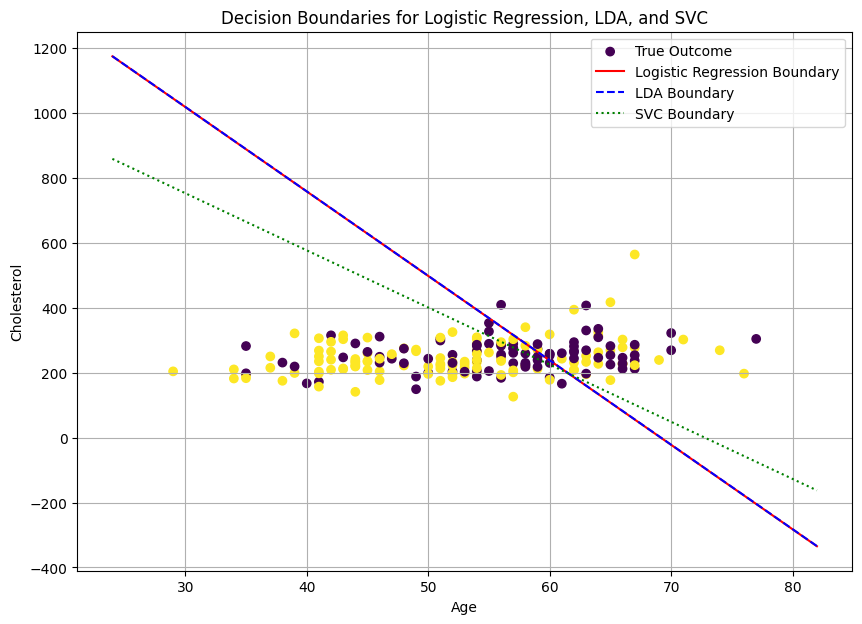

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of age values for plotting decision boundaries
age_range = np.linspace(df['age'].min() - 5, df['age'].max() + 5, 100)

# Calculate cholesterol for Logistic Regression decision boundary
# intercept + coef_age * age + coef_chol * chol = 0
# chol = (-intercept - coef_age * age) / coef_chol
chol_log_reg = (-intercept - coef_age * age_range) / coef_chol

# Calculate cholesterol for LDA decision boundary
# lda_intercept + lda_coef[0] * age + lda_coef[1] * chol = 0
# chol = (-lda_intercept - lda_coef[0] * age) / lda_coef[1]
chol_lda = (-lda_intercept - lda_coef[0] * age_range) / lda_coef[1]

# Calculate cholesterol for SVC decision boundary
# svc_intercept + svc_coef[0] * age + svc_coef[1] * chol = 0
# chol = (-svc_intercept - svc_coef[0] * age) / svc_coef[1]
chol_svc = (-svc_intercept - svc_coef[0] * age_range) / svc_coef[1]

# Create the scatterplot
plt.figure(figsize=(10, 7))

# Scatter plot of true disease outcomes
plt.scatter(df['age'], df['chol'], c=df['diagnosis_numeric'], cmap='viridis', label='True Outcome')

# Plot decision boundaries
plt.plot(age_range, chol_log_reg, color='red', linestyle='-', label='Logistic Regression Boundary')
plt.plot(age_range, chol_lda, color='blue', linestyle='--', label='LDA Boundary')
plt.plot(age_range, chol_svc, color='green', linestyle=':', label='SVC Boundary')

# Add plot enhancements
plt.title('Decision Boundaries for Logistic Regression, LDA, and SVC')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.grid(True)
plt.show()